## 讀取591 房屋數據

In [1]:
import pandas as pd
link = 'https://raw.githubusercontent.com/ywchiu/cathaylifepy/master/data/rent591.xlsx' 
df = pd.read_excel(link, index_col=0)
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date
0,復興南路160巷精華地段雙..,2,15,2房1廳1衛,28.0,"43,800",2180,2019/06/05
1,"臥龍街前眺101後擁山景,..",11,12,3房2廳2衛,69.0,"120,000",1722,2019/06/05
2,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"130,000",3272,2016/12/14
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,"36,000",4890,2019/02/26
4,和平東路一段和平大..,4,11,2房2廳1衛,16.0,"30,000",4900,2019/06/04


In [4]:
(df['area'] / 0.3025).head()

0     92.561983
1    228.099174
2    235.702479
3     36.363636
4     52.892562
Name: area, dtype: float64

In [6]:
import numpy as np
np.sqrt(df['area']).head()

0    5.291503
1    8.306624
2    8.443933
3    3.316625
4    4.000000
Name: area, dtype: float64

In [10]:
(df['address'] + '-' +df['price'] ).head()

0     復興南路160巷精華地段雙..-43,800
1    臥龍街前眺101後擁山景,..-120,000
2     光復南路高樓層大巨蛋正對..-130,000
3      信義路三段台北大安森林公..-36,000
4         和平東路一段和平大..-30,000
dtype: object

In [11]:
df['square_feet'] = df['area'] / 0.3025

In [12]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date,square_feet
0,復興南路160巷精華地段雙..,2,15,2房1廳1衛,28.0,"43,800",2180,2019/06/05,92.561983
1,"臥龍街前眺101後擁山景,..",11,12,3房2廳2衛,69.0,"120,000",1722,2019/06/05,228.099174
2,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"130,000",3272,2016/12/14,235.702479
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,"36,000",4890,2019/02/26,36.363636
4,和平東路一段和平大..,4,11,2房2廳1衛,16.0,"30,000",4900,2019/06/04,52.892562


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 21
Data columns (total 9 columns):
address          772 non-null object
floor            772 non-null int64
allfloor         772 non-null int64
layout           772 non-null object
area             772 non-null float64
price            772 non-null object
browsenum_all    772 non-null int64
created_date     767 non-null object
square_feet      772 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 60.3+ KB


In [15]:
df['price'].dtypes

dtype('O')

In [18]:
s = '43,800'
int(s.replace(',',''))

43800

In [19]:
def normalizePrice(ele):
    res = int(ele.replace(',', ''))
    return res

normalizePrice(s)

43800

In [21]:
df['price'].map(normalizePrice).head()

0     43800
1    120000
2    130000
3     36000
4     30000
Name: price, dtype: int64

In [22]:
def normalizePrice(ele):
    res = int(ele.replace(',', ''))
    return res

normalizePrice2 = lambda ele: int(ele.replace(',', ''))

In [23]:
df['price'].map(normalizePrice2).head()

0     43800
1    120000
2    130000
3     36000
4     30000
Name: price, dtype: int64

In [24]:
df['price'].map(lambda ele: int(ele.replace(',', ''))).head()

0     43800
1    120000
2    130000
3     36000
4     30000
Name: price, dtype: int64

In [36]:
df['price'] = df['price'].map(lambda ele: int(ele.replace(',', '')))

In [37]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date,square_feet
0,復興南路160巷精華地段雙..,2,15,2房1廳1衛,28.0,43800,2180,2019/06/05,92.561983
1,"臥龍街前眺101後擁山景,..",11,12,3房2廳2衛,69.0,120000,1722,2019/06/05,228.099174
2,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,130000,3272,2016/12/14,235.702479
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,36000,4890,2019/02/26,36.363636
4,和平東路一段和平大..,4,11,2房2廳1衛,16.0,30000,4900,2019/06/04,52.892562


In [34]:
s = pd.Series([0, 1, 2, 3, 4])
s.replace(0, 5)

0    5
1    1
2    2
3    3
4    4
dtype: int64

In [38]:
df2 = pd.DataFrame(\
 [\
    [60,70,50],\
    [80,79,68],\
    [63,66,82]], \
columns = ['First', 'Second', 'Third'])
df2

,First,Second,Third
0,60,70,50
1,80,79,68
2,63,66,82


In [39]:
df2.apply(lambda e: e.max() - e.min(), axis = 0)

First     20
Second    13
Third     32
dtype: int64

In [40]:
df2.apply(lambda e: e.max() - e.min(), axis = 1)

0    20
1    12
2    19
dtype: int64

In [42]:
df2.applymap(lambda e: '$'+str(e))

,First,Second,Third
0,$60,$70,$50
1,$80,$79,$68
2,$63,$66,$82


## 時間格式資料
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [43]:
a = '2019-07-09'
b = '2019-01-01'
a - b

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [47]:
from datetime import datetime
current_time = datetime.now()

In [48]:
current_time.strftime('%Y-%m-%d')

'2019-07-09'

In [51]:
boy = datetime.strptime('2019-01-01','%Y-%m-%d')
boy

datetime.datetime(2019, 1, 1, 0, 0)

In [52]:
current_time - boy

datetime.timedelta(189, 36034, 918176)

In [54]:
(current_time - boy).days

189

In [55]:
from datetime import timedelta
current_time - timedelta(days = 1)

datetime.datetime(2019, 7, 8, 10, 0, 34, 918176)

In [56]:
current_time - timedelta(days = 10)

datetime.datetime(2019, 6, 29, 10, 0, 34, 918176)

In [57]:
current_time + timedelta(days = 10)

datetime.datetime(2019, 7, 19, 10, 0, 34, 918176)

In [58]:
for i in range(10):
    dt = current_time - timedelta(days = i)
    print(dt.strftime('%Y/%m/%d'))

2019/07/09
2019/07/08
2019/07/07
2019/07/06
2019/07/05
2019/07/04
2019/07/03
2019/07/02
2019/07/01
2019/06/30


In [59]:
from time import mktime 
mktime(current_time.timetuple())

1562637634.0

In [60]:
datetime.fromtimestamp(1555860118)

datetime.datetime(2019, 4, 21, 23, 21, 58)

In [62]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date,square_feet
0,復興南路160巷精華地段雙..,2,15,2房1廳1衛,28.0,43800,2180,2019/06/05,92.561983
1,"臥龍街前眺101後擁山景,..",11,12,3房2廳2衛,69.0,120000,1722,2019/06/05,228.099174
2,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,130000,3272,2016/12/14,235.702479
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,36000,4890,2019/02/26,36.363636
4,和平東路一段和平大..,4,11,2房2廳1衛,16.0,30000,4900,2019/06/04,52.892562


In [64]:
df['created_date'] = pd.to_datetime(df['created_date'], format = '%Y/%m/%d')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 21
Data columns (total 9 columns):
address          772 non-null object
floor            772 non-null int64
allfloor         772 non-null int64
layout           772 non-null object
area             772 non-null float64
price            772 non-null int64
browsenum_all    772 non-null int64
created_date     767 non-null datetime64[ns]
square_feet      772 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 60.3+ KB


In [69]:
df[df['created_date'] > '2019-01-01'].head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date,square_feet
0,復興南路160巷精華地段雙..,2,15,2房1廳1衛,28.0,43800,2180,2019-06-05,92.561983
1,"臥龍街前眺101後擁山景,..",11,12,3房2廳2衛,69.0,120000,1722,2019-06-05,228.099174
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,36000,4890,2019-02-26,36.363636
4,和平東路一段和平大..,4,11,2房2廳1衛,16.0,30000,4900,2019-06-04,52.892562
5,和平東路二段師大商..,2,4,2房1廳1衛,23.0,23009,9627,2019-06-13,76.033058


In [70]:
b = '2019-12-31'
a = '2019-01-01'

db = datetime.strptime(b,'%Y-%m-%d')
da = datetime.strptime(a,'%Y-%m-%d')

In [72]:
ary = []
for i in range(365):
    dt = da + timedelta(i)
    ary.append(dt)
s = pd.Series(ary)

In [82]:
#s.dt.month
#s.dt.week
df3 = pd.concat([s, s.dt.weekday, s.dt.week, s.dt.month], axis = 1)

In [84]:
df3.columns = ['date', 'weekday', 'week', 'month']

In [96]:
# 挑出星期五
df3  = df3[df3['weekday'] == 4]

#把每個月的最後一週列出來
c = df3.groupby('month')['week'].transform(max)
c.head()

3     4
10    4
17    4
24    4
31    8
Name: week, dtype: int64

In [98]:
#把每個月的最後一週星期五列出來
df3[df3['week'] == c].head()

,date,weekday,week,month
24,2019-01-25,4,4,1
52,2019-02-22,4,8,2
87,2019-03-29,4,13,3
115,2019-04-26,4,17,4
150,2019-05-31,4,22,5


## 正規表達法

In [99]:
s = 'i am david, here is my phone number: 0912345678'
'0912345678' in s

True

In [100]:
s2 = 'i am hubert, here is my phone number: 0922335678'
'0912345678' in s2

False

In [101]:
import re

In [102]:
n = '3'

In [103]:
re.match('3', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [104]:
re.match('5', n)

In [105]:
# []: match any charater within []
re.match('[0123456789]', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [106]:
# -: continuous
# [0123456789] => [0-9]
re.match('[0-9]', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [107]:
# \d => [0-9]
re.match('\d', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [108]:
s = 'w'
re.match('[abcdefghijklmnopqrstuvwxyz]', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [109]:
re.match('[a-z]', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [110]:
re.match('[a-z]', n)

In [111]:
re.match('[a-z0-9]', n)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [112]:
s  = 'W'
re.match('[a-z0-9]', s)

In [113]:
re.match('[a-zA-Z0-9]', s)

<_sre.SRE_Match object; span=(0, 1), match='W'>

In [114]:
# \w => [a-zA-Z0-9]
re.match('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='W'>

In [115]:
s = '$'
re.match('\w', s)

In [116]:
# .: match any charater
re.match('.', s)

<_sre.SRE_Match object; span=(0, 1), match='$'>

In [117]:
s = 'apple'
re.match('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [118]:
re.match('\w\w\w\w\w', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [119]:
# {m} : match exact m charaters
re.match('\w{5}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [120]:
s = 'appledaily'
re.match('\w{5}', s)

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [121]:
# {m,n} : match at least m charaters, at most n charaters
re.match('\w{5,10}', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [122]:
# {m,} : match at least m charaters
re.match('\w{5,}', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [123]:
re.match('\w{1,}', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [124]:
# + => {1,}
re.match('\w+', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [125]:
# * => {0,}
re.match('\w*', s)

<_sre.SRE_Match object; span=(0, 10), match='appledaily'>

In [130]:
phones = ['0912345678','0912-345678','0912-345-678', '09123453748748924789324798247928492']
for p in phones:
    #m = re.match('09\d{8}', p)
    #m = re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}', p)
    
    # ? => {0,1}
    #m = re.match('09\d{2}-?\d{3}-?\d{3}', p)
    
    # ^ : match begin, $ match end
    m = re.match('^09\d{2}-?\d{3}-?\d{3}$', p)
    print(m)

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
None


In [134]:
#df['layout'].map(lambda e: e.split('房')[0])

In [137]:
df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛').head()

,0,1,2
0,2,1,1
1,3,2,2
2,4,2,2
3,1,2,1
4,2,2,1


In [138]:
df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

In [148]:
df['address'].head()

0    復興南路160巷精華地段雙..
1    臥龍街前眺101後擁山景,..
2     光復南路高樓層大巨蛋正對..
3     信義路三段台北大安森林公..
4        和平東路一段和平大..
Name: address, dtype: object

In [145]:
df['road'] = df['address'].str.extract('(.+?[路街]).+')

In [147]:
df['road'].value_counts()

忠孝東路    95
仁愛路     79
信義路     77
和平東路    58
光復南路    58
復興南路    46
敦化南路    45
羅斯福路    41
安和路     37
大安路     29
建國南路    28
瑞安街     25
永康街     14
臥龍街     12
新生南路    12
通化街     10
泰順街     10
四維路      9
辛亥路      9
延吉街      9
基隆路      8
樂利路      8
杭州南路     5
師大路      4
浦城街      4
通安街      3
麗水街      3
金華街      2
樂業街      2
文昌街      2
潮州街      2
安東街      1
嘉興街      1
吳興街      1
青田街      1
濟南路      1
Name: road, dtype: int64

## Pandas Aggregation

In [153]:
# SELECT created_date, AVG(price) FROM df GROUP BY created_date
df.groupby('created_date')['price'].mean().head()

created_date
2010-01-01     40000.0
2010-07-08     35000.0
2010-10-08    150000.0
2010-12-06     35000.0
2011-11-27     20000.0
Name: price, dtype: float64

In [156]:
# SELECT created_date, road, AVG(price) FROM df GROUP BY created_date, road
df.groupby(['created_date', 'road'])['price'].mean().head()

created_date  road
2010-01-01    通化街      40000.0
2010-07-08    安和路      35000.0
2010-10-08    光復南路    150000.0
2010-12-06    光復南路     35000.0
2011-11-27    瑞安街      20000.0
Name: price, dtype: float64

In [158]:
df.groupby('created_date')['price'].sum().head()

created_date
2010-01-01     40000
2010-07-08     35000
2010-10-08    150000
2010-12-06     35000
2011-11-27     20000
Name: price, dtype: int64

In [159]:
df.groupby('created_date')['price'].mean().head()

created_date
2010-01-01     40000.0
2010-07-08     35000.0
2010-10-08    150000.0
2010-12-06     35000.0
2011-11-27     20000.0
Name: price, dtype: float64

In [160]:
df.groupby('created_date')['price'].std().head()

created_date
2010-01-01   NaN
2010-07-08   NaN
2010-10-08   NaN
2010-12-06   NaN
2011-11-27   NaN
Name: price, dtype: float64

In [166]:
# SELECT created_date, AVG(price) FROM df 
# GROUP BY created_date ORDER BY AVG(price) DESC
df.groupby('created_date')['price'].mean().sort_values(ascending = False).head()

created_date
2018-08-30    280000.0
2019-01-26    260000.0
2018-08-18    249999.0
2018-11-13    220000.0
2019-01-17    200000.0
Name: price, dtype: float64

In [170]:
df.sort_values('price', ascending=False).head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date,square_feet,layout_bedroom,layout_livingroom,layout_bathroom,road
26,仁愛路三段成交多戶帝寶找我看..,8,18,5房2廳4衛,210.7,350000,201,2019-05-16,696.528926,5,2,4,仁愛路
25,瑞安街81巷瑞安豪宅❂裝潢、家..,2,13,4房2廳3衛,112.6,280000,262,2018-08-30,372.231405,4,2,3,瑞安街
28,瑞安街81巷大陽台全新裝潢近森..,2,13,4房2廳4衛,112.6,280000,65,2019-06-03,372.231405,4,2,4,瑞安街
13,敦化南路二段華麗裝潢、敦化南..,21,21,6房4廳5衛,89.0,260000,79,2019-06-04,294.214876,6,4,5,敦化南路
15,敦化南路二段★貴族豪邸★霸氣..,21,21,6房4廳5衛,89.2,260000,103,2019-05-29,294.876033,6,4,5,敦化南路


## Data Reshape

In [173]:
pd.get_dummies(df['road']).head(3)

,仁愛路,信義路,光復南路,吳興街,和平東路,嘉興街,四維路,基隆路,大安路,安和路,...,濟南路,瑞安街,羅斯福路,臥龍街,辛亥路,通化街,通安街,金華街,青田街,麗水街
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
roads = pd.get_dummies(df['road'])
#roads.head(3)
df2 = pd.concat([df, roads], axis = 1)

In [180]:
# del df2['road']
# df2.drop('road', axis = 1)

In [183]:
df2 = pd.pivot_table(df, index='created_date', columns='road', values='price', aggfunc=sum)

In [184]:
df2 = pd.pivot_table(df, index='road', columns='created_date', values='price', aggfunc=sum)

In [188]:
df['year'] = df['created_date'].dt.year
df['month'] = df['created_date'].dt.month

In [189]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date,square_feet,layout_bedroom,layout_livingroom,layout_bathroom,road,year,month
0,復興南路160巷精華地段雙..,2,15,2房1廳1衛,28.0,43800,2180,2019-06-05,92.561983,2,1,1,復興南路,2019.0,6.0
1,"臥龍街前眺101後擁山景,..",11,12,3房2廳2衛,69.0,120000,1722,2019-06-05,228.099174,3,2,2,臥龍街,2019.0,6.0
2,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,130000,3272,2016-12-14,235.702479,4,2,2,光復南路,2016.0,12.0
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,36000,4890,2019-02-26,36.363636,1,2,1,信義路,2019.0,2.0
4,和平東路一段和平大..,4,11,2房2廳1衛,16.0,30000,4900,2019-06-04,52.892562,2,2,1,和平東路,2019.0,6.0


In [190]:
df2 = pd.pivot_table(df, index='road', columns=['year', 'month'], values='price', aggfunc=sum)

In [192]:
#df2

## 資料合併

In [193]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']}, index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'], 'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'], 'D': ['D4', 'D5', 'D6', 'D7']},
index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'], 'B': ['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'], 'D': ['D8', 'D9', 'D10', 'D11']}, index=[8, 9, 10, 11])

In [194]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [195]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [196]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [197]:
pd.concat([df1, df2, df3], axis = 0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [198]:
pd.concat([df1, df2, df3], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [201]:
df4 = df1.reset_index(drop='index')
df4

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [202]:
df5 = df2.reset_index(drop='index')
df5

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [203]:
df6 = df3.reset_index(drop='index')
df6

,A,B,C,D
0,A8,B8,C8,D8
1,A9,B9,C9,D9
2,A10,B10,C10,D10
3,A11,B11,C11,D11


In [204]:
pd.concat([df4, df5, df6], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


In [205]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'], 'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'], 'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [207]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [208]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [210]:
# SELECT * FROM left INNER JOIN right ON left.key = right.key
pd.merge(left, right, on = 'key', how = 'inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [211]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'], 'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'], 'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']})

In [212]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [213]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [215]:
# SELECT * FROM left INNER JOIN right ON left.key1 = right.key1 AND left.key2 = right.key2
pd.merge(left, right, how = 'inner', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [216]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2']},
index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'], 'D': ['D0', 'D2', 'D3']},
index=['K0', 'K2', 'K3'])

In [217]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [218]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [219]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


## 資料儲存

In [220]:
import sqlite3 as lite

# 建立連線
con = lite.connect('test.sqlite')

# 建立游標 Cursor
cur = con.cursor()

cur.execute('SELECT SQLITE_VERSION()')

data = cur.fetchone()
print(data)

# 關閉連線
con.cursor()

('3.24.0',)


In [221]:
import sqlite3 as lite

# 建立連線
with lite.connect('test.sqlite') as con:

    # 建立游標 Cursor
    cur = con.cursor()

    cur.execute('SELECT SQLITE_VERSION()')

    data = cur.fetchone()
    print(data)


('3.24.0',)


In [223]:
import sqlite3 as lite
with lite.connect("test.sqlite") as con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
    cur.execute("SELECT phone,address FROM PhoneAddress")
    
    data = cur.fetchall()
    print(data)

[('0912173381', 'United State'), ('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [224]:
import sqlite3 as lite
with lite.connect("test.sqlite") as con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
    cur.execute("SELECT phone,address FROM PhoneAddress")
    data1 = cur.fetchone()
    print(data1)
    
    data2 = cur.fetchall()
    print(data2)

('0912173381', 'United State')
[('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [225]:
import sqlite3 as lite
import pandas
employee = [{'name':'Mary', 'age':23 , 'gender': 'F'},
            {'name':'John','age':33 , 'gender': 'M'}]
df = pandas.DataFrame(employee)
df

,age,gender,name
0,23,F,Mary
1,33,M,John


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
age       2 non-null int64
gender    2 non-null object
name      2 non-null object
dtypes: int64(1), object(2)
memory usage: 128.0+ bytes


In [227]:
with lite.connect('test.sqlite') as db:
    df.to_sql(name='employee', 
              index=False, 
              con=db,
              if_exists='replace')

In [228]:
with lite.connect('test.sqlite') as db:
    df2 = pd.read_sql_query('SELECT * FROM employee', con = db)
df2

,age,gender,name
0,23,F,Mary
1,33,M,John


In [230]:
import pandas as pd
link = 'https://raw.githubusercontent.com/ywchiu/cathaylifepy/master/data/rent591.xlsx' 
df = pd.read_excel(link, index_col=0)
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date
0,復興南路160巷精華地段雙..,2,15,2房1廳1衛,28.0,"43,800",2180,2019/06/05
1,"臥龍街前眺101後擁山景,..",11,12,3房2廳2衛,69.0,"120,000",1722,2019/06/05
2,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"130,000",3272,2016/12/14
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,"36,000",4890,2019/02/26
4,和平東路一段和平大..,4,11,2房2廳1衛,16.0,"30,000",4900,2019/06/04


In [231]:
df['price'] = df['price'].map(lambda e: int(e.replace(',','')))

In [232]:
df[['layout_bedroom','layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

In [234]:
del df['layout']

In [236]:
df['created_date'] = pd.to_datetime(df['created_date'], format = '%Y/%m/%d')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 21
Data columns (total 10 columns):
address              772 non-null object
floor                772 non-null int64
allfloor             772 non-null int64
area                 772 non-null float64
price                772 non-null int64
browsenum_all        772 non-null int64
created_date         767 non-null datetime64[ns]
layout_bedroom       766 non-null object
layout_livingroom    766 non-null object
layout_bathroom      766 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 66.3+ KB


In [240]:
with lite.connect('house.sqlite') as db:
    df.to_sql('rent591', con = db, if_exists='replace', index=False)

In [243]:
with lite.connect('house.sqlite') as db:
    df2 = pd.read_sql_query('select * from rent591 order by price desc limit 3', 
                            con = db)
df2

,address,floor,allfloor,area,price,browsenum_all,created_date,layout_bedroom,layout_livingroom,layout_bathroom
0,仁愛路三段成交多戶帝寶找我看..,8,18,210.7,350000,201,2019-05-16 00:00:00,5,2,4
1,瑞安街81巷大陽台全新裝潢近森..,2,13,112.6,280000,65,2019-06-03 00:00:00,4,2,4
2,瑞安街81巷瑞安豪宅❂裝潢、家..,2,13,112.6,280000,262,2018-08-30 00:00:00,4,2,3


## 敘述性統計

In [244]:
import pandas
tw2330 = pandas.read_csv('/Users/davidchiu/Downloads/2330.TW.csv')

In [245]:
tw2330.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,40.966045,2.006623e+11
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,41.886593,4.024668e+11
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,40.966045,1.975457e+11
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,39.815269,2.352703e+11
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,41.196129,2.761717e+11


### Pandas Data Reader
- ! pip install pandas_datareader

In [246]:
! pip install pandas_datareader

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [249]:
from  pandas_datareader import DataReader
tw2330 = DataReader('2330.TW', 'yahoo', start='2000-01-01')
tw2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,38.253021
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,39.112621
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,38.253021
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,37.178459
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,38.467876


In [250]:
from  pandas_datareader import DataReader
twii = DataReader('^TWII', 'yahoo', start='2000-01-01')
twii.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-03,10812.650391,10720.660156,10793.099609,10743.769531,1.818992e+09,10743.769531
2019-07-04,10791.280273,10750.900391,10755.870117,10775.900391,1.529290e+09,10775.900391
2019-07-05,10812.379883,10756.669922,10785.849609,10785.730469,1.526565e+09,10785.730469
2019-07-08,10781.110352,10708.919922,10742.809570,10751.219727,1.580007e+09,10751.219727
2019-07-09,10733.570312,10680.849609,10729.830078,10702.780273,0.000000e+00,10702.780273


In [251]:
from  pandas_datareader import DataReader
df = DataReader('2330.TW', 'yahoo', start='2000-01-01')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,38.253021
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,39.112621
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,38.253021
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,37.178459
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,38.467876


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4810 entries, 2000-01-04 to 2019-07-09
Data columns (total 6 columns):
High         4810 non-null float64
Low          4810 non-null float64
Open         4810 non-null float64
Close        4810 non-null float64
Volume       4810 non-null float64
Adj Close    4810 non-null float64
dtypes: float64(6)
memory usage: 263.0 KB


In [253]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4810.000000,4810.000000,4810.000000,4810.000000,4.810000e+03,4810.000000
mean,95.484138,93.757703,94.650074,94.666780,2.361551e+10,75.097943
std,61.406840,60.767846,61.116425,61.120196,4.565349e+10,63.630447
min,27.612900,26.918800,26.995701,27.458401,0.000000e+00,15.080860
25%,52.939301,51.556599,52.338325,52.253075,3.147096e+07,30.247988
50%,66.888901,65.560501,66.265751,66.353748,4.959361e+07,43.145550
75%,124.500000,122.500000,123.500000,123.500000,4.005206e+10,103.658463
max,270.000000,267.500000,270.000000,269.000000,4.476381e+11,260.340027


In [254]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [256]:
df['Close'].min()

27.45840072631836

In [257]:
df['Close'].max()

269.0

In [258]:
df['Close'].count()

4810

In [259]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,38.253021
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,39.112621
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,38.253021
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,37.178459
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,38.467876


In [260]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-03,245.0,242.0,244.0,242.5,29449774.0,242.5
2019-07-04,245.0,242.5,244.5,244.0,17481240.0,244.0
2019-07-05,245.0,241.5,244.5,243.0,22867074.0,243.0
2019-07-08,244.5,240.0,240.0,242.5,27787909.0,242.5
2019-07-09,243.0,240.5,241.5,242.0,16369000.0,242.0


In [262]:
a = [50,70,60,80,90]
sum(a) / len(a)

70.0

In [265]:
pa = pd.Series(a)
pa.mean()

70.0

In [266]:
a.sort()

In [268]:
a[2]

70

In [269]:
pa = pd.Series(a)
pa.median()

70.0

In [270]:
a = [0,50,70,60,80,90]
pa = pandas.Series(a)

In [271]:
pa.mean()

58.333333333333336

In [272]:
pa.median()

65.0

In [273]:
a.sort()
a

[0, 50, 60, 70, 80, 90]

In [275]:
df['Close'].mean()

94.6667804836979

In [276]:
df['Close'].median()

66.3537483215332

In [277]:
a = [10,20,30,50,70,80,90]
pa = pd.Series(a)
pa.median()

50.0

In [278]:
#25
pa.quantile(0.25)

25.0

In [279]:
# 75
pa.quantile(0.75)

75.0

In [280]:
pa.quantile(0.75) - pa.quantile(0.25)

50.0

In [282]:
df['Close'].quantile(0.75) - df['Close'].quantile(0.25)

71.2469253540039

In [283]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4810.000000,4810.000000,4810.000000,4810.000000,4.810000e+03,4810.000000
mean,95.484138,93.757703,94.650074,94.666780,2.361551e+10,75.097943
std,61.406840,60.767846,61.116425,61.120196,4.565349e+10,63.630447
min,27.612900,26.918800,26.995701,27.458401,0.000000e+00,15.080860
25%,52.939301,51.556599,52.338325,52.253075,3.147096e+07,30.247988
50%,66.888901,65.560501,66.265751,66.353748,4.959361e+07,43.145550
75%,124.500000,122.500000,123.500000,123.500000,4.005206e+10,103.658463
max,270.000000,267.500000,270.000000,269.000000,4.476381e+11,260.340027


In [284]:
?pa.plot(kind = )

### Jupyter Notebook Magic
- https://ethanww.github.io/2017/05/08/jupyter%E9%AD%94%E6%B3%95%E5%91%BD%E4%BB%A4/

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


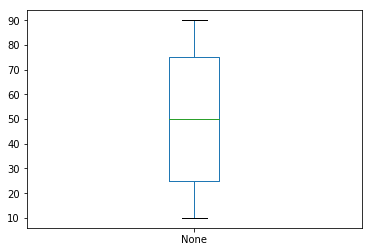

In [286]:
%pylab inline
pa.plot(kind = 'box' )

In [289]:
pa.quantile(0.25)

25.0

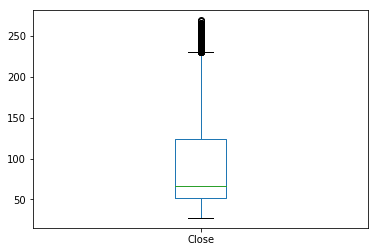

In [291]:
df['Close'].plot(kind = 'box')

In [297]:
temp = np.random.randint(0,30,100)

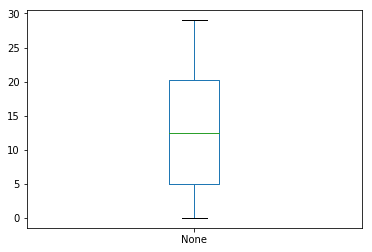

In [299]:
pd.Series(temp).plot(kind = 'box')

In [303]:
a = temp.tolist()
a.extend([99,99,99])

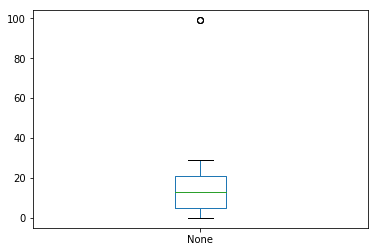

In [304]:
pd.Series(a).plot(kind = 'box')

In [305]:
import pandas as pd
link = 'https://raw.githubusercontent.com/ywchiu/cathaylifepy/master/data/rent591.xlsx' 
df = pd.read_excel(link, index_col=0)
df['price'] = df['price'].map(lambda e: int(e.replace(',','')))

In [307]:
df['road'] = df['address'].str.extract('(.+?[路街]).+')

In [309]:
df['avg_price'] = df['price'] / df['area']

In [312]:
df2 = df[df['road'].isin(['光復南路', '仁愛路'])]

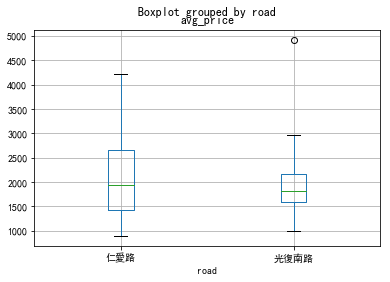

In [320]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

df2.boxplot(column = 'avg_price', by = 'road')

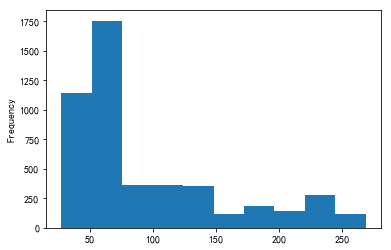

In [322]:
tw2330['Close'].plot(kind = 'hist')

In [325]:
tw2330['Close'].std()

61.120195876532144

In [326]:
tw2330['Close'].var()

3735.6783439856567

In [327]:
tw2330['Close'].std() ** 2

3735.6783439856567

## 資料分佈

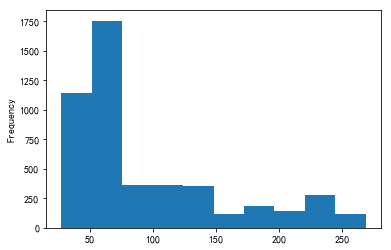

In [328]:
tw2330['Close'].plot(kind = 'hist')

In [330]:
tw2330['Close'].head()

Date
2000-01-04    69.649002
2000-01-05    71.214104
2000-01-06    69.649002
2000-01-07    67.692497
2000-01-10    70.040199
Name: Close, dtype: float64

In [331]:
tw2330['Close'].shift(1).head()

Date
2000-01-04          NaN
2000-01-05    69.649002
2000-01-06    71.214104
2000-01-07    69.649002
2000-01-10    67.692497
Name: Close, dtype: float64

In [333]:
(tw2330['Close']  / tw2330['Close'].shift(1) -1).head()

Date
2000-01-04         NaN
2000-01-05    0.022471
2000-01-06   -0.021977
2000-01-07   -0.028091
2000-01-10    0.034682
Name: Close, dtype: float64

In [335]:
tw2330['Close'].pct_change(1).head()

Date
2000-01-04         NaN
2000-01-05    0.022471
2000-01-06   -0.021977
2000-01-07   -0.028091
2000-01-10    0.034682
Name: Close, dtype: float64

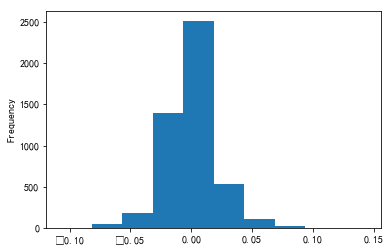

In [336]:
tw2330['Close'].pct_change(1).plot(kind = 'hist')

In [338]:
tw2330['Close'].pct_change(1).std()

0.02026874044351495

In [344]:
from  pandas_datareader import DataReader
stocks = DataReader(['2330.TW', '2317.TW', '2498.TW', '2454.TW'], 'yahoo')['Close']
stocks.head()

Symbols,2317.TW,2330.TW,2454.TW,2498.TW
Date,,,,
2010-01-04,98.203400,64.900002,555.882019,331.519012
2010-01-05,98.851601,64.500000,556.862976,337.415009
2010-01-06,98.203400,64.900002,563.724976,338.776001
2010-01-07,97.231102,64.199997,550.000000,324.717010
2010-01-08,97.555199,64.000000,539.216003,332.425995


In [346]:
stocks.pct_change(1).mean()

Symbols
2317.TW    0.000030
2330.TW    0.000671
2454.TW   -0.000013
2498.TW   -0.000499
dtype: float64

In [347]:
stocks.pct_change(1).std()

Symbols
2317.TW    0.016089
2330.TW    0.014617
2454.TW    0.021565
2498.TW    0.029017
dtype: float64

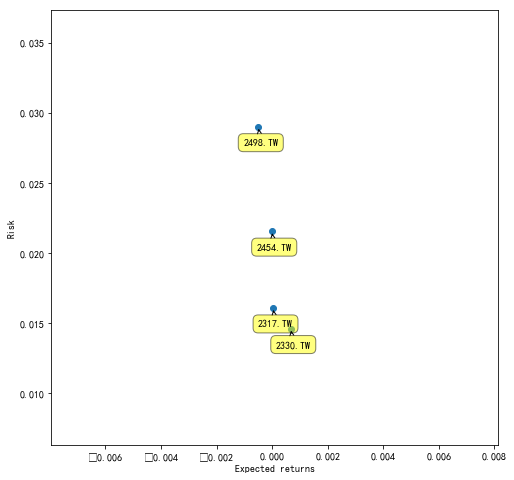

In [352]:
from matplotlib import pyplot as plt
rets = stocks.pct_change(1)

plt.figure(figsize=(8,8))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [354]:
stocks2  = DataReader(['^TWII', '2330.TW'], 'yahoo')['Close']

In [356]:
stocks2.corr()

Symbols,2330.TW,^TWII
Symbols,,
2330.TW,1.000000,0.891788
^TWII,0.891788,1.000000


In [357]:
stocks2.cov()

Symbols,2330.TW,^TWII
Symbols,,
2330.TW,3849.632858,6.246518e+04
^TWII,62465.183244,1.272309e+06


In [358]:
stocks.head()

Symbols,2317.TW,2330.TW,2454.TW,2498.TW
Date,,,,
2010-01-04,98.203400,64.900002,555.882019,331.519012
2010-01-05,98.851601,64.500000,556.862976,337.415009
2010-01-06,98.203400,64.900002,563.724976,338.776001
2010-01-07,97.231102,64.199997,550.000000,324.717010
2010-01-08,97.555199,64.000000,539.216003,332.425995


In [359]:
stocks.corr()

Symbols,2317.TW,2330.TW,2454.TW,2498.TW
Symbols,,,,
2317.TW,1.000000,0.584946,-0.088099,-0.461430
2330.TW,0.584946,1.000000,-0.462532,-0.691680
2454.TW,-0.088099,-0.462532,1.000000,0.177124
2498.TW,-0.461430,-0.691680,0.177124,1.000000


([<matplotlib.axis.YTick at 0x117ade5c0>,
 <a list of 4 Text yticklabel objects>)

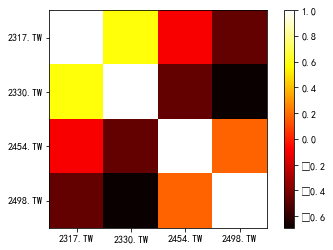

In [360]:
corr = stocks.corr()
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

In [363]:
df = DataReader('aapl', data_source='yahoo',start='2014-01-01') 
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,204.490005,200.649994,203.169998,201.550003,27316700.0,201.550003
2019-07-02,203.130005,201.360001,201.410004,202.729996,16935200.0,202.729996
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,204.410004
2019-07-05,205.080002,202.899994,203.350006,204.229996,17265500.0,204.229996
2019-07-08,201.399994,198.410004,200.809998,200.020004,25287800.0,200.020004


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


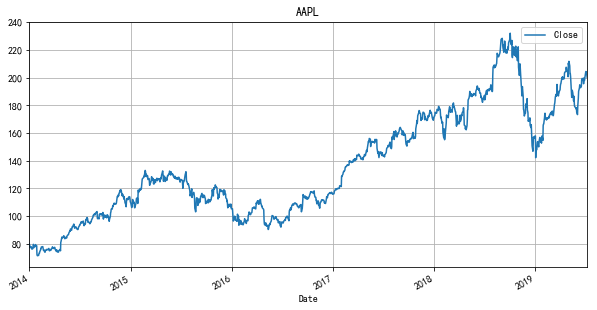

In [364]:
% pylab inline
df['Close'].plot(kind='line', 
                 figsize=[10,5], 
                 title= "AAPL", 
                 legend=True, 
                 grid=True)

In [369]:
df['mvg20'] = df['Close'].rolling(window=20).mean()
df['mvg120'] = df['Close'].rolling(window=120).mean()

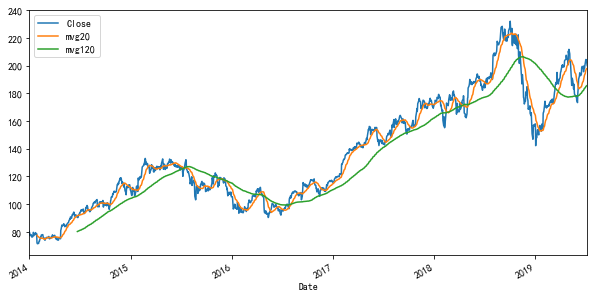

In [370]:
df[['Close', 'mvg20', 'mvg120']].plot(kind = 'line', figsize = [10,5])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11794ec18>,
      dtype=object)

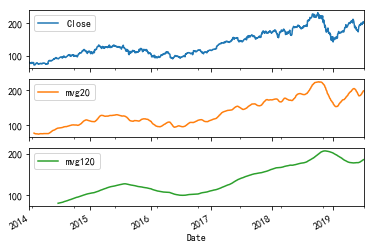

In [373]:
df[['Close', 'mvg20', 'mvg120']].plot(kind = 'line',subplots=True)

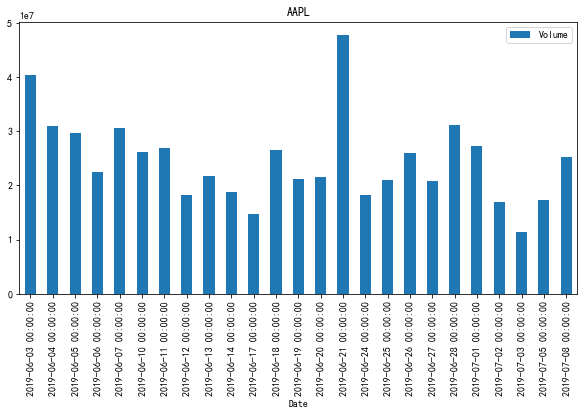

In [382]:
df[df.index >= '2019-06-01']['Volume'].plot(kind = 'bar', figsize = [10,5], title = 'AAPL', legend = True)

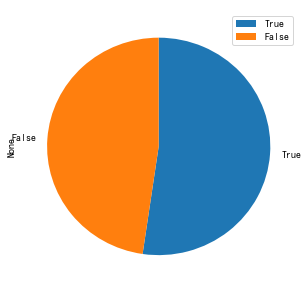

In [392]:
stat = (df['Close'] > df['Open']).value_counts()
stat.plot(kind = 'pie', figsize = [5,5], startangle = 90, counterclock = False, legend = True)

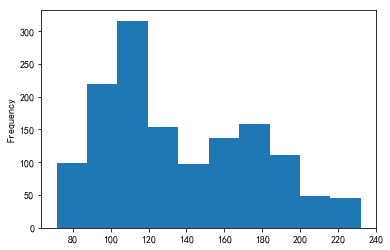

In [393]:
df['Close'].plot(kind = 'hist')

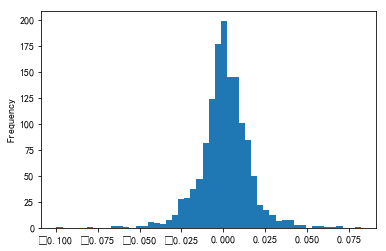

In [396]:
df['Close'].pct_change(1).plot(kind = 'hist', bins = 50)

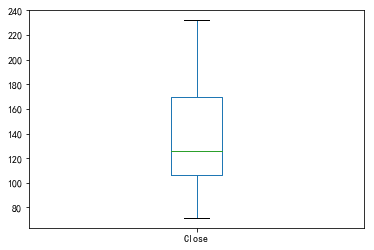

In [397]:
df['Close'].plot(kind = 'box')

In [399]:
stocks = DataReader(['FB','AMZN', 'NFLX', 'GOOG'], data_source='yahoo',start='2014-01-01') ['Close']
stocks.tail()

Symbols,AMZN,FB,GOOG,NFLX
Date,,,,
2019-07-01,1922.189941,193.000000,1097.949951,374.600006
2019-07-02,1934.310059,195.000000,1111.250000,375.429993
2019-07-03,1939.000000,197.199997,1121.579956,381.720001
2019-07-05,1942.910034,196.399994,1131.589966,380.549988
2019-07-08,1952.319946,195.759995,1116.349976,376.160004


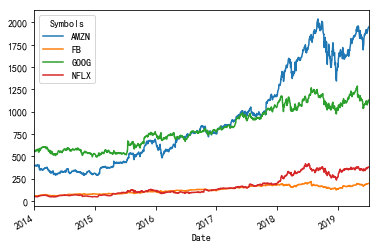

In [400]:
stocks.plot(kind = 'line')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11695fb70>,
      dtype=object)

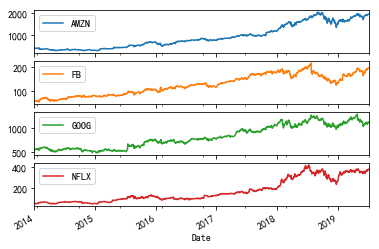

In [401]:
stocks.plot(kind = 'line', subplots = True)

In [402]:
rets = stocks.pct_change(1)

In [403]:
rets.head()

Symbols,AMZN,FB,GOOG,NFLX
Date,,,,
2013-12-31,NaN,NaN,NaN,NaN
2014-01-02,-0.002056,0.001098,-0.006772,-0.014531
2014-01-03,-0.003845,-0.002742,-0.007295,0.000772
2014-01-06,-0.007088,0.048387,0.011149,-0.009722
2014-01-07,0.011178,0.012587,0.019278,-0.055817


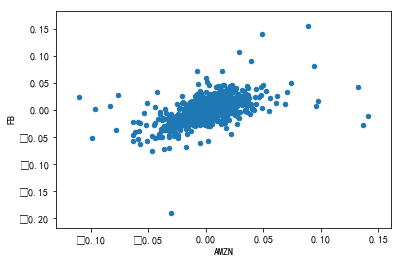

In [405]:
rets.plot(x = 'AMZN', y = 'FB', kind ='scatter')

In [406]:
rets.corr()

Symbols,AMZN,FB,GOOG,NFLX
Symbols,,,,
AMZN,1.000000,0.541706,0.627640,0.456222
FB,0.541706,1.000000,0.601316,0.392694
GOOG,0.627640,0.601316,1.000000,0.461659
NFLX,0.456222,0.392694,0.461659,1.000000


([<matplotlib.axis.YTick at 0x1188609e8>,
 <a list of 4 Text yticklabel objects>)

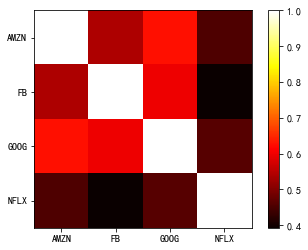

In [407]:
corr = rets.corr()
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

In [408]:
import pandas as pd
link = 'https://raw.githubusercontent.com/ywchiu/cathaylifepy/master/data/rent591.xlsx' 
df = pd.read_excel(link, index_col=0)
df['price'] = df['price'].map(lambda e: int(e.replace(',','')))

In [409]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,created_date
0,復興南路160巷精華地段雙..,2,15,2房1廳1衛,28.0,43800,2180,2019/06/05
1,"臥龍街前眺101後擁山景,..",11,12,3房2廳2衛,69.0,120000,1722,2019/06/05
2,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,130000,3272,2016/12/14
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,36000,4890,2019/02/26
4,和平東路一段和平大..,4,11,2房2廳1衛,16.0,30000,4900,2019/06/04


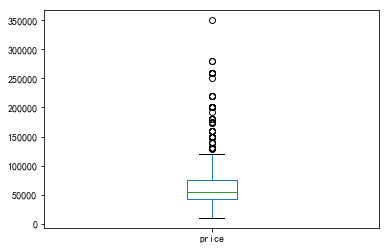

In [410]:
df['price'].plot(kind = 'box')

In [411]:
df['avg_price'] = df['price'] / df['area']

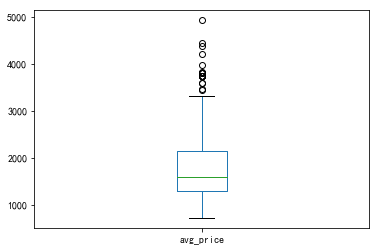

In [412]:
df['avg_price'].plot(kind = 'box')

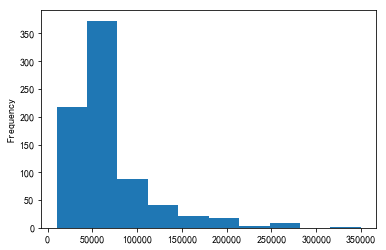

In [413]:
df['price'].plot(kind = 'hist')

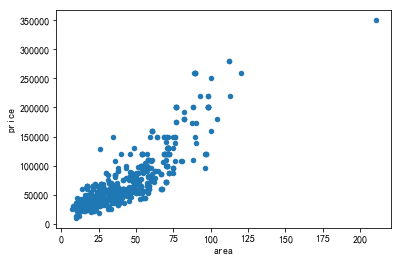

In [414]:
df.plot(x = 'area', y = 'price', kind = 'scatter')

Populating the interactive namespace from numpy and matplotlib


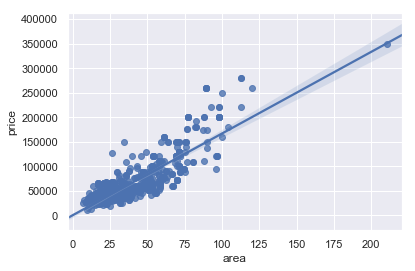

In [415]:
%pylab inline
import seaborn as sns 
sns.set(color_codes=True)

ax = sns.regplot(x="area", y="price", data=df)

## Plotly
- ! pip install plotly
- ! pip install cufflinks

In [417]:
! pip install cufflinks

    100% |████████████████████████████████| 81kB 417kB/s ta 0:00:01
  Running setup.py bdist_wheel for cufflinks ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/8d/5a/6f/c97d47dc901071611809eb61aaa477d50a60692dc764dca622


Successfully built cufflinks
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [420]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.iplot(kind='box', filename='cufflinks/box-plots')

## Bokeh
- https://bokeh.pydata.org/en/latest/

## Tableau
- Tableau Public
- https://public.tableau.com/en-us/s/

- https://youtu.be/C0xcXvte8N0

## 真實房屋資料分析案例

In [421]:
import warnings
## Ignoring warnings 
warnings.filterwarnings('ignore')

import pandas 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



### Reading Data

In [422]:
import pandas
trainData = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathaylifepy/master/data/train.csv')
testData = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathaylifepy/master/data/test.csv')

In [423]:
trainData.shape

(1460, 81)

In [424]:
testData.shape

(1459, 80)

### Feature Engineering

In [425]:
import pandas

trainData['dataType'] ='train'
testData['dataType']  ='test'

SalePrice = trainData['SalePrice']
fullData  = pandas.concat((trainData, testData)).reset_index(drop=True)
fullData.drop(['SalePrice'], axis=1, inplace=True)

In [426]:
nullcount = fullData.isnull().sum().sort_values(ascending=False)
nullcount

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
Functional          2
BsmtHalfBath        2
Utilities           2
BsmtFinSF1          1
GarageCars          1
Electrical          1
TotalBsmtSF         1
SaleType            1
GarageArea          1
BsmtUnfSF           1
                 ... 
YearRemodAdd        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
Neighborho

In [427]:
percent = (fullData.isnull().sum()/fullData.isnull().count()).sort_values(ascending=False)

In [428]:
percent

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
LotFrontage      0.166495
GarageCond       0.054471
GarageFinish     0.054471
GarageQual       0.054471
GarageYrBlt      0.054471
GarageType       0.053786
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MasVnrArea       0.007879
MSZoning         0.001370
BsmtFullBath     0.000685
Functional       0.000685
BsmtHalfBath     0.000685
Utilities        0.000685
BsmtFinSF1       0.000343
GarageCars       0.000343
Electrical       0.000343
TotalBsmtSF      0.000343
SaleType         0.000343
GarageArea       0.000343
BsmtUnfSF        0.000343
                   ...   
YearRemodAdd     0.000000
YearBuilt        0.000000
WoodDeckSF       0.000000
TotRmsAbvGrd     0.000000
Street           0.000000
ScreenPorch      0.000000
SaleCondition    0.000000
RoofStyle   

In [430]:
fullData['Electrical'].value_counts()
fullData['Electrical'].fillna("SBrkr", inplace=True)
fullData['Electrical'].isnull().sum()

0

In [431]:
fullData['KitchenQual'].fillna("TA", inplace=True)
fullData['KitchenQual'].isnull().sum()

0

In [432]:
fullData['Exterior1st'].fillna("VinylSd", inplace=True)
fullData['Exterior2nd'].fillna("VinylSd", inplace=True)

In [433]:
fullData['MasVnrType'].fillna("None", inplace=True)
fullData['MasVnrType'].isnull().sum()

0

In [434]:
fullData['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [435]:
fullData['MasVnrArea'].fillna(0.0, inplace=True)
fullData['MasVnrArea'].isnull().sum()

0

In [436]:
fullData['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [437]:
for col in ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFullBath','BsmtHalfBath']:
    print(fullData[col].value_counts())

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64


In [438]:
fullData['BsmtQual'].fillna("None", inplace=True)
fullData['BsmtCond'].fillna("None", inplace=True)
fullData['BsmtFinType1'].fillna("None", inplace=True)
fullData['BsmtFinType2'].fillna("None", inplace=True)
fullData['BsmtExposure'].fillna("No", inplace=True)

In [439]:
for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    print(fullData[col].describe())

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [440]:
for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    print(fullData[col].describe())

fullData['BsmtFinSF1'].fillna(0.0, inplace=True)
fullData['BsmtFinSF2'].fillna(0.0, inplace=True)
fullData['BsmtUnfSF'].fillna(467.0, inplace=True)
fullData['TotalBsmtSF'].fillna(0.0, inplace=True)

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [441]:
fullData['TotalBsmtSF'].fillna(0.0, inplace=True)

In [442]:
for e in ['GarageCond','GarageType','GarageFinish','GarageQual','GarageCars']:
    print(e)

GarageCond
GarageType
GarageFinish
GarageQual
GarageCars


In [443]:
fullData['GarageType'].fillna("None", inplace=True)
fullData['GarageFinish'].fillna("None", inplace=True)
fullData['GarageCond'].fillna("None", inplace=True)
fullData['GarageQual'].fillna("None", inplace=True)
fullData['GarageYrBlt'].fillna(0.0, inplace=True)

In [444]:
fullData['GarageCars'].fillna(0.0, inplace=True)
fullData['GarageArea'].fillna(0.0, inplace=True)

In [445]:
fullData['Functional'].isnull().sum()

fullData = fullData[fullData['Functional'].notnull()]

In [446]:
fullData['Utilities'].fillna('AllPub', inplace=True)

In [447]:
fullData['SaleType'].fillna('WD', inplace=True)

In [448]:
fullData['MSZoning'].fillna('RL', inplace=True)

In [449]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def imputeMissing(df, idx, predictors):
    tempdf = df[df[outcome].isnull()].index
    tempndf = df[df[idx].notnull()].index
    model = RandomForestRegressor(n_estimators=100)
    model.fit(df.loc[tempndf, predictors], df.loc[tempndf, [outcome]])
    predict = model.predict(df.loc[tempndf, predictors])
    j=0;
    for i in tempdf:
        df.loc[i,outcome] = predict[j]
        j=j+1
    return(df)

In [450]:
predictors=['LotArea','Street','LotShape','LandContour','LotConfig']
outcome='LotFrontage'

var_mod = ['Street','LotShape','LandContour','LotConfig']
le = LabelEncoder()
for i in var_mod:
    fullData[i] = le.fit_transform(fullData[i].astype(str))

fullData = imputeMissing(fullData,outcome,predictors)
fullData['LotFrontage'].isnull().sum()

0

In [453]:
fullData.isnull().sum().sort_values(ascending = False).head(10)

PoolQC          2907
MiscFeature     2812
Alley           2720
Fence           2346
FireplaceQu     1418
BsmtHalfBath       2
BsmtFullBath       2
dataType           0
Fireplaces         0
ExterQual          0
dtype: int64

### Outliars/Noise filtering

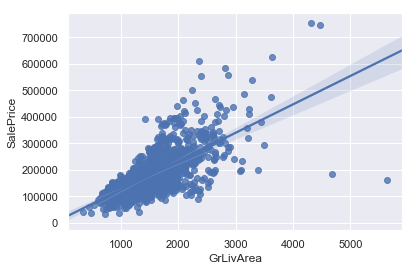

In [454]:
sns.regplot(x=trainData["GrLivArea"], y=trainData["SalePrice"])

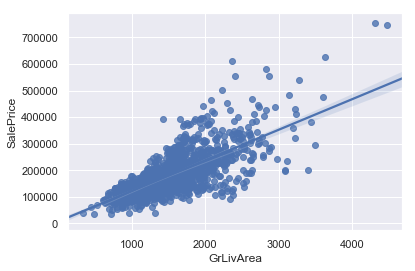

In [455]:
trainData = trainData.drop(trainData[(trainData['GrLivArea']>4000) & (trainData['SalePrice']<200000)].index)
sns.regplot(x=trainData["GrLivArea"], y=trainData["SalePrice"])

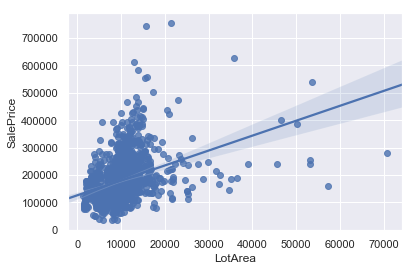

In [456]:
trainData = trainData.drop(trainData[(trainData['LotArea']>100000) & (trainData['SalePrice']<450000)].index)
sns.regplot(x=trainData["LotArea"], y=trainData["SalePrice"])

In [457]:

skipedCols = ['SalePrice', 'PoolQC','MiscFeature','Alley','Id','Fence','FireplaceQu','dataType']
predictors = [x for x in trainData.columns if x not in skipedCols]


In [459]:
 trainData[predictors].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


### Data Encoding

In [460]:
le = LabelEncoder()
for i in predictors:
    trainData[i] = le.fit_transform(trainData[i].astype(str))

In [461]:
 trainData[predictors].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,9,3,74,853,1,3,3,0,4,0,...,164,0,0,0,0,0,4,2,8,4
1,4,3,89,1024,1,3,3,0,2,0,...,0,0,0,0,0,0,7,1,8,4
2,9,3,77,161,1,0,3,0,4,0,...,142,0,0,0,0,0,11,2,8,4
3,10,3,69,1015,1,0,3,0,0,0,...,133,78,0,0,0,0,4,0,8,0
4,9,3,93,385,1,0,3,0,2,0,...,186,0,0,0,0,0,3,2,8,4


In [462]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model1, trainData[predictors], trainData['SalePrice'],cv=kfold)

print("CV Score")
print("Mean : {}".format(round(np.mean(results),4)))
print("Standard Deviation : {}".format(round(np.std(results),4)))
print("Min : {}".format(round(np.min(results),4)))
print("Max : {}".format(round(np.max(results),4)))

CV Score
Mean : 0.787
Standard Deviation : 0.0356
Min : 0.7067
Max : 0.8387


In [463]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [464]:
seed = 7
model1 = GradientBoostingRegressor(random_state=10)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model1, trainData[predictors], trainData['SalePrice'],scoring='r2', cv=kfold)

### View the first model performance metrics
print("CV Score")
print("Mean : {}".format(round(np.mean(results),4)))
print("Standard Deviation : {}".format(round(np.std(results),4)))
print("Min : {}".format(round(np.min(results),4)))
print("Max : {}".format(round(np.max(results),4)))

CV Score
Mean : 0.8805
Standard Deviation : 0.0216
Min : 0.8519
Max : 0.9246
